In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r'D:\B Drive\Data Science\Practice Data\Heart Disease UCI.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

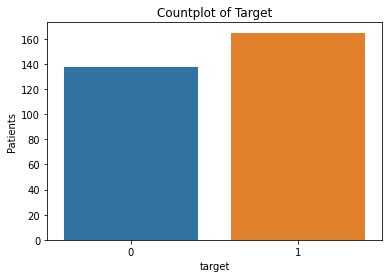

In [6]:
sns.countplot(df['target'])
plt.title('Countplot of Target')
plt.xlabel('target')
plt.ylabel('Patients')
plt.show()

In [8]:
x=  df[df['target']==1]
y=  df[df['target']==0]
x.shape,y.shape

((165, 14), (138, 14))

Let us proceed by splitting our training and test data and our input and target variables. Scaling our datasets too:

In [15]:
y = df["target"].values
x = df.drop(["target"], axis = 1)

#Scaling - mandatory for knn
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

#SPlitting into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test

we can evaluate the training and testing scores for up to 20 nearest neighbors:

In [16]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To evaluate the max test score and the k values associated with it, run the following command:

In [17]:
## score that comes from the testing set only
max_test_score = max(test_score)
test_scores_ind = [i for i, v in enumerate(test_score) if v == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 84.61538461538461 and k = [12, 16, 18, 19, 20]


Thus, we have obtained the optimum value of k to be 3, 11, or 20 with a score of 84.62. We will finalize one of these values and fit the model accordingly:

In [18]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8131868131868132

Now, how do we evaluate whether this model is a ‘good’ model or not? For that, we use something called a Confusion Matrix:

In [19]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,34,11,45
1,6,40,46
All,40,51,91


We can generate the above metrics for our dataset using sklearn too:

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        45
           1       0.78      0.87      0.82        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



Let us generate a ROC curve for our model with k = 3.

In [21]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [22]:
roc_auc_score(y_test, y_pred_proba)

0.8770531400966184

Like the ROC, we plot the precision and recall for different threshold values:

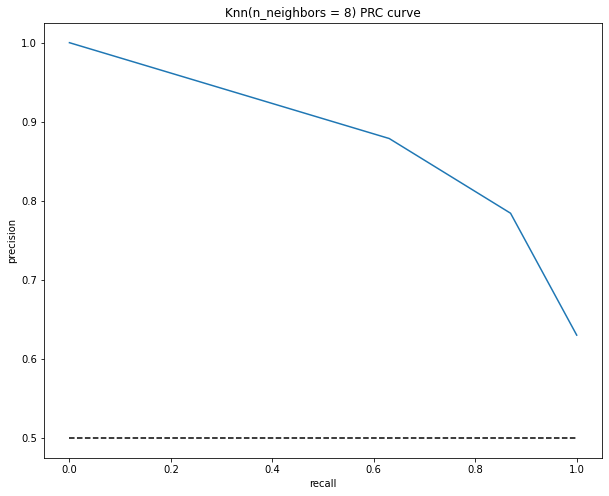

In [23]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

In [24]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.8833225043767033
